In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

# Reading the files

In [152]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarliteFull/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq3


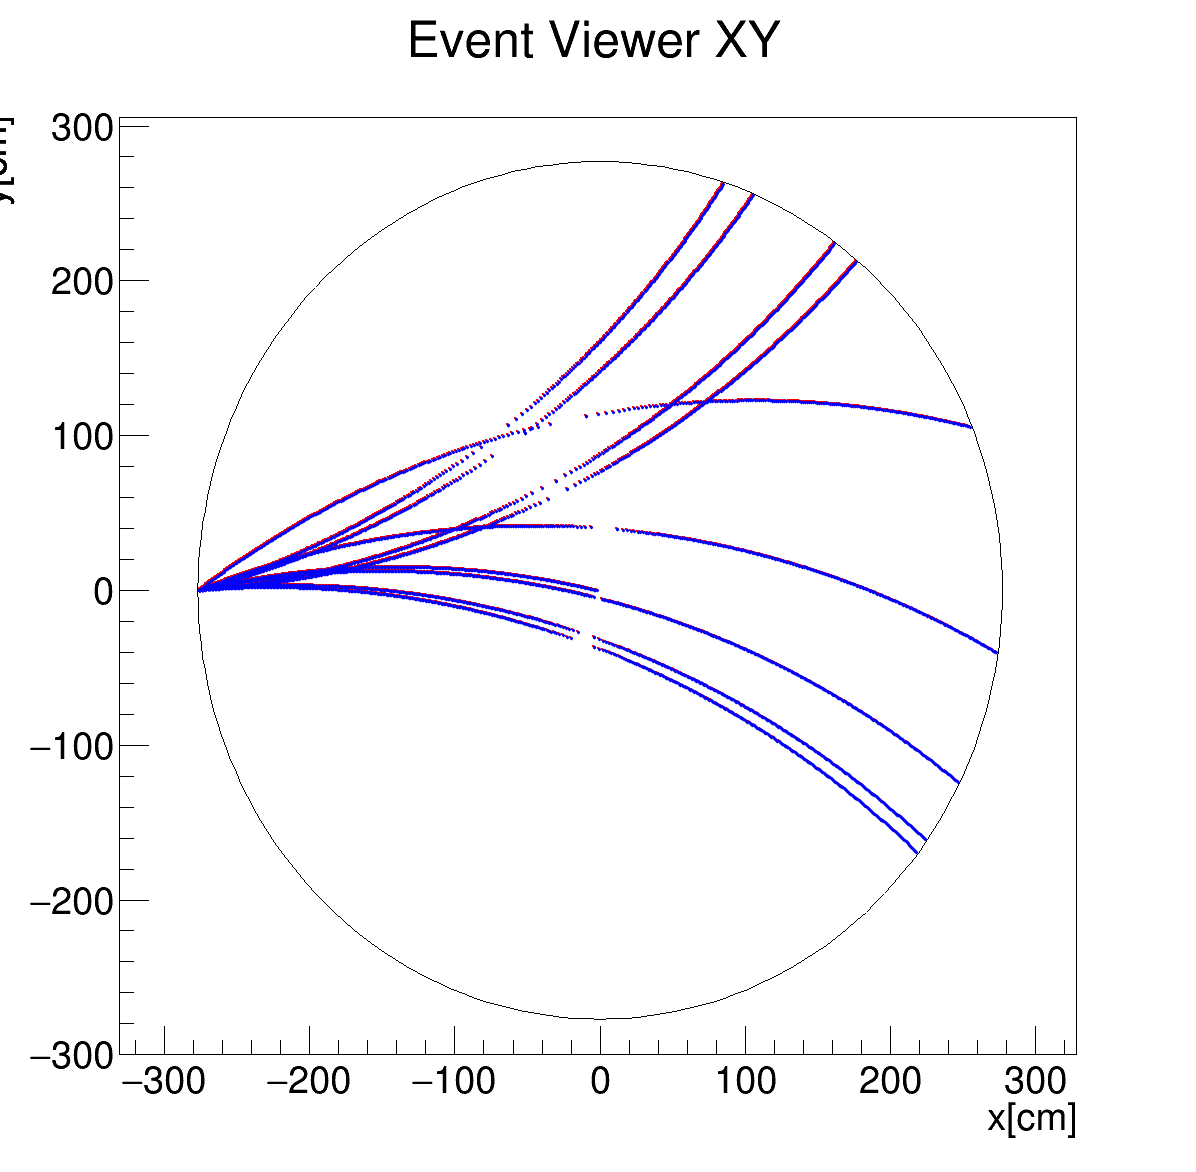

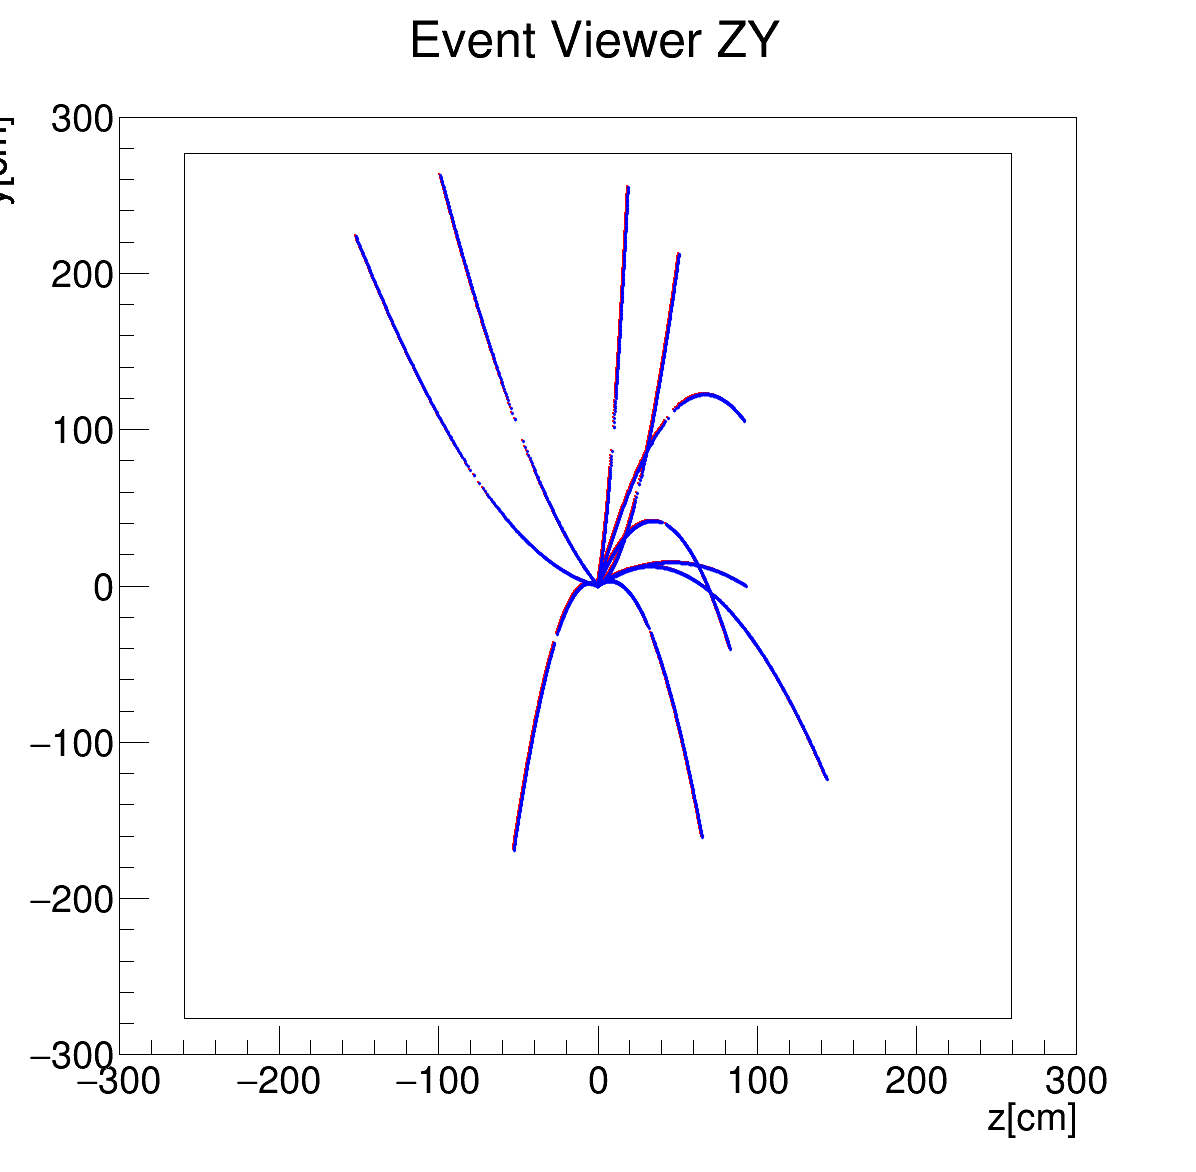

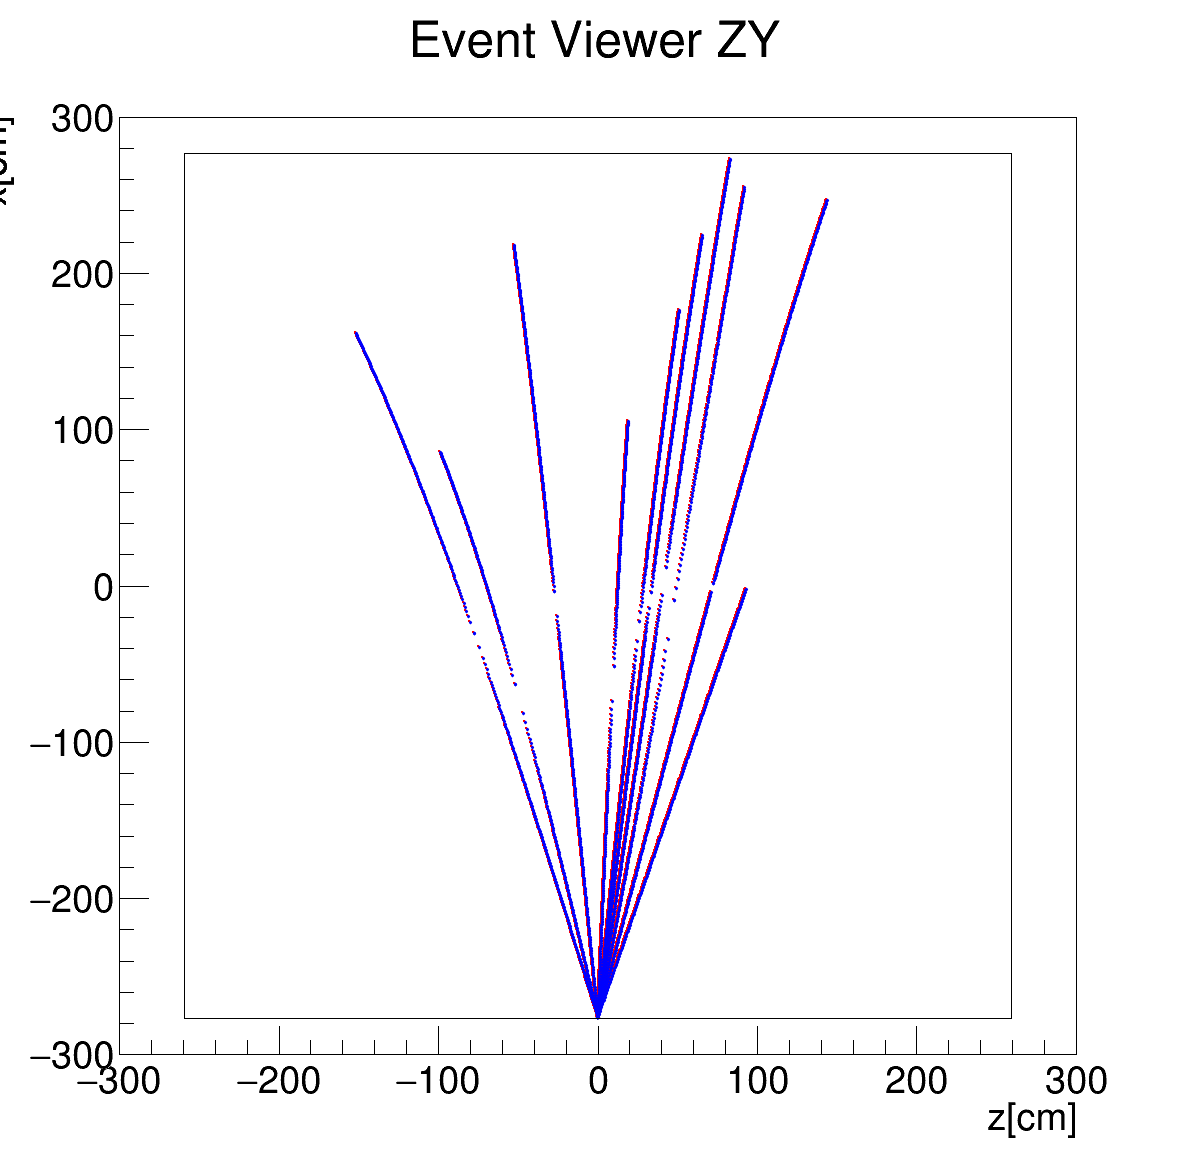

In [153]:
#hXY = ROOT.TH2D("hdist","hdist",800,-400,400,800,-400,400)
x = array('d')
y = array('d')
z = array('d')
xorg = []
yorg = []
zorg = []

xr = array('d')
yr = array('d')
zr = array('d')

for iev in range(0,10):
    tree.GetEntry(iev)
    #print("entry number: ",str(iev))
    #if (tree.part.fStatusMaskIn[1]!=31 or tree.part.fParamMC.size()==0): continue


    xsingle = array('d')
    ysingle = array('d')
    zsingle = array('d')
    

    for i in range(1,tree.part.fParamMC.size()-1):
        
        xyz = [tree.part.fParamMC[i].GetX(),tree.part.fParamMC[i].GetParameter()[0],tree.part.fParamMC[i].GetParameter()[1]]
        xyzr = [tree.part.fParamIn[i].GetX(),tree.part.fParamIn[i].GetParameter()[0],tree.part.fParamIn[i].GetParameter()[1]]

        alpha = tree.part.fParamMC[i].GetAlpha()
        alphar = tree.part.fParamIn[i].GetAlpha()

        xyz_gl = [xyz[0]*np.cos(alpha)-xyz[1]*np.sin(alpha), xyz[0]*np.sin(alpha)+xyz[1]*np.cos(alpha), xyz[2]]
        xyzr_gl = [xyzr[0]*np.cos(alphar)-xyzr[1]*np.sin(alphar), xyzr[0]*np.sin(alphar)+xyzr[1]*np.cos(alphar), xyzr[2]]
        #if(tree.part.fLoop[i]==0): continue
        x.append(xyz_gl[0])
        y.append(xyz_gl[1])
        z.append(xyz_gl[2])
        xsingle.append(xyz_gl[0])
        ysingle.append(xyz_gl[1])
        zsingle.append(xyz_gl[2])

        xr.append(xyzr_gl[0])
        yr.append(xyzr_gl[1])
        zr.append(xyzr_gl[2])
        
    #print(xsingle)
    xorg.append(xsingle)
    yorg.append(ysingle)
    zorg.append(zsingle)

graph = ROOT.TGraph(len(x),x,y)
graphr = ROOT.TGraph(len(xr),xr,yr)


hq = ROOT.TCanvas("hq","hq",1200,1200)
graph.SetTitle("Event Viewer XY;x[cm];y[cm]")
graph.SetMarkerColor(2)
graph.SetMarkerSize(0.3)
graph.SetMarkerStyle(21)

graphr.SetMarkerStyle(20)  
graphr.SetMarkerColor(4)
graphr.SetMarkerSize(0.3)
         
graph.GetHistogram().SetMinimum(-300)  #   Y
graphr.GetHistogram().SetMinimum(-300)  #   Y
graphr.GetHistogram().SetMaximum(300)   #   Y
graphr.GetXaxis().SetLimits(-300,300)   #   X

el1 = ROOT.TEllipse(0,0,277,277)
#el1 = ROOT.TEllipse(0,0,2300,2300)
el1.SetFillStyle(0)
graph.Draw("AP")
graphr.Draw("P same")
el1.Draw("same")
hq.Draw()

graphz = ROOT.TGraph(len(z),z,y)
graphzr = ROOT.TGraph(len(zr),zr,yr)


hq2 = ROOT.TCanvas("hq2","hq2",1200,1200)
graphz.SetTitle("Event Viewer ZY;z[cm];y[cm]")
graphz.SetMarkerColor(2)
graphz.SetMarkerSize(0.3)
graphz.SetMarkerStyle(21) 
graphzr.SetMarkerColor(4)
graphzr.SetMarkerSize(0.3)
graphzr.SetMarkerStyle(20)         
graphz.GetHistogram().SetMinimum(-300)  #   Y
graphz.GetHistogram().SetMaximum(300)   #   Y
graphz.GetXaxis().SetLimits(-300,300)   #   X
graphzr.GetHistogram().SetMinimum(-300)  #   Y
graphzr.GetHistogram().SetMaximum(300)   #   Y
graphzr.GetXaxis().SetLimits(-300,300)   #   X
box1=ROOT.TBox(-259,-277,259,277)
box1.SetFillStyle(0)
graphz.Draw("AP")
graphzr.Draw("P same")
box1.Draw("same")
hq2.Draw()

graphx = ROOT.TGraph(len(z),z,x)
graphxr = ROOT.TGraph(len(zr),zr,xr)


hq3 = ROOT.TCanvas("hq3","hq3",1200,1200)
graphx.SetTitle("Event Viewer ZY;z[cm];x[cm]")
graphx.SetMarkerColor(2)
graphx.SetMarkerSize(0.3)
graphx.SetMarkerStyle(21) 
graphxr.SetMarkerColor(4)
graphxr.SetMarkerSize(0.3)
graphxr.SetMarkerStyle(20)         
graphx.GetHistogram().SetMinimum(-300)  #   Y
graphx.GetHistogram().SetMaximum(300)   #   Y
graphx.GetXaxis().SetLimits(-300,300)   #   X
graphxr.GetHistogram().SetMinimum(-300)  #   Y
graphxr.GetHistogram().SetMaximum(300)   #   Y
graphxr.GetXaxis().SetLimits(-300,300)   #   X
box2=ROOT.TBox(-259,-277,259,277)
box2.SetFillStyle(0)
graphx.Draw("AP")
graphxr.Draw("P same")
box2.Draw("same")
hq3.Draw()

        
        